In [1]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Agar grafik tampil lebih enak
sns.set(style='whitegrid')
%matplotlib inline 

In [4]:
df = pd.read_csv('application_train.csv')  # sesuaikan path jika perlu
print("Ukuran data:", df.shape)
df.head()

Ukuran data: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/9t/b_0d0z456hb3d5j3kdnwgz580000gn/T/ipykernel_28145/2347253838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=df, palette='Set2')


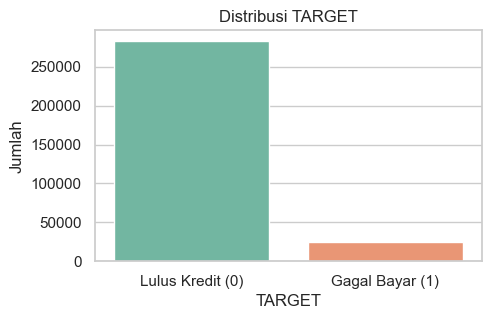

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [5]:
# 3. Target distribution
plt.figure(figsize=(5,3))
sns.countplot(x='TARGET', data=df, palette='Set2')
plt.title('Distribusi TARGET')
plt.xticks([0,1], ['Lulus Kredit (0)', 'Gagal Bayar (1)'])
plt.ylabel('Jumlah')
plt.show()

# Presentase
print(df['TARGET'].value_counts(normalize=True))

In [6]:
# 4. Missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Total Missing': missing,
    '%': missing_percent.round(2)
})

print("Kolom dengan missing values terbanyak:")
print(missing_df.head(10))

Kolom dengan missing values terbanyak:
                          Total Missing      %
COMMONAREA_MEDI                  214865  69.87
COMMONAREA_AVG                   214865  69.87
COMMONAREA_MODE                  214865  69.87
NONLIVINGAPARTMENTS_MEDI         213514  69.43
NONLIVINGAPARTMENTS_MODE         213514  69.43
NONLIVINGAPARTMENTS_AVG          213514  69.43
FONDKAPREMONT_MODE               210295  68.39
LIVINGAPARTMENTS_MODE            210199  68.35
LIVINGAPARTMENTS_MEDI            210199  68.35
LIVINGAPARTMENTS_AVG             210199  68.35


In [7]:
# 5. Cek fitur numerik vs kategorikal
numerics = df.select_dtypes(include=[np.number])
categoricals = df.select_dtypes(include=['object'])

print(f"Jumlah fitur numerik: {numerics.shape[1]}")
print(f"Jumlah fitur kategorikal: {categoricals.shape[1]}")

Jumlah fitur numerik: 106
Jumlah fitur kategorikal: 16


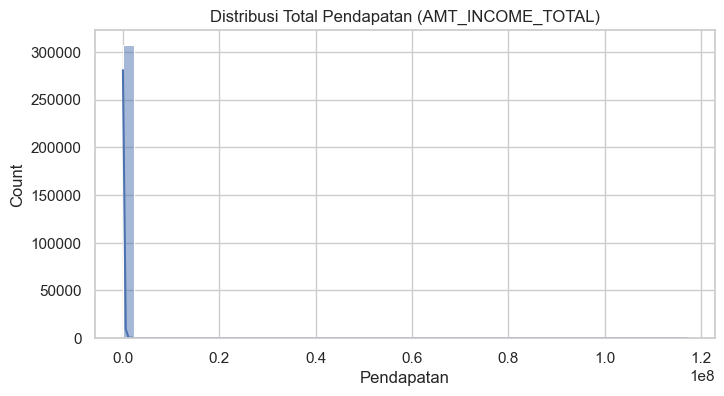

In [8]:
# Distribusi pendapatan
plt.figure(figsize=(8,4))
sns.histplot(df['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title("Distribusi Total Pendapatan (AMT_INCOME_TOTAL)")
plt.xlabel("Pendapatan")
plt.show()

In [9]:
# Korelasi numerik dengan target
corr = df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)

print("Fitur dengan korelasi positif tertinggi terhadap gagal bayar:")
print(corr.head(10))

print("\nFitur dengan korelasi negatif tertinggi terhadap gagal bayar:")
print(corr.tail(10))

Fitur dengan korelasi positif tertinggi terhadap gagal bayar:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

Fitur dengan korelasi negatif tertinggi terhadap gagal bayar:
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


In [11]:
df['AGE'] = (-df['DAYS_BIRTH']) // 365

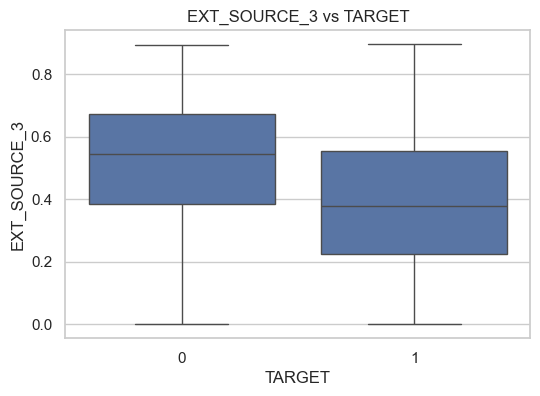

In [12]:
# Boxplot EXT_SOURCE_3
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='EXT_SOURCE_3', data=df)
plt.title('EXT_SOURCE_3 vs TARGET')
plt.show()

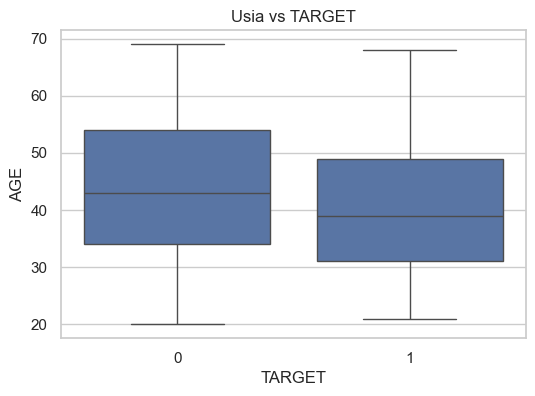

In [13]:
# Boxplot Usia
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AGE', data=df)
plt.title('Usia vs TARGET')
plt.show()

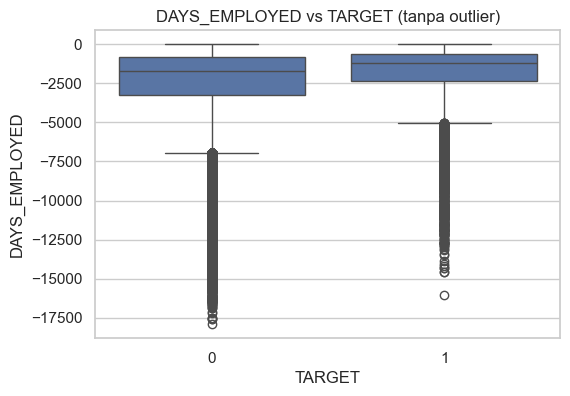

In [14]:
# Boxplot Masa Kerja
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=df[df['DAYS_EMPLOYED'] < 100000])
plt.title('DAYS_EMPLOYED vs TARGET (tanpa outlier)')
plt.show()

In [15]:
df.to_csv('df_final_merged_all.csv', index=False)